**Импорт необходимых библиотек**

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

**Предобработка данных**

In [61]:
train_df = pd.read_csv('trainee_train.csv', index_col='Unnamed: 0')
test_df = pd.read_csv('trainee_test_fish.csv', index_col='Unnamed: 0')
train_df.head()

,im,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v437,v438,v439,v440,v441,v442,v443,v444,v445,v446
0,0.0,128.100243,128.157072,129.255102,128.273006,126.532819,129.023232,129.854839,129.828431,129.868526,...,128.800985,128.232694,128.211893,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
1,1.0,128.100243,128.157072,126.636364,128.273006,130.810403,129.023232,128.633333,128.994152,128.994152,...,128.914365,128.232694,128.211893,128.167519,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
2,1.0,128.100243,128.157072,129.255102,128.273006,130.810403,129.023232,126.769231,126.926295,127.196460,...,128.800985,128.232694,128.211893,128.167519,128.051724,127.709786,127.349282,127.063052,125.169118,125.274194
3,1.0,128.100243,128.157072,127.630027,128.273006,126.532819,129.023232,126.769231,126.926295,127.196460,...,128.800985,130.794007,131.026119,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
4,1.0,128.100243,128.336364,129.255102,128.273006,130.810403,126.042980,129.854839,126.926295,127.196460,...,128.800985,130.794007,131.026119,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150


In [4]:
train_df.describe()

,im,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v437,v438,v439,v440,v441,v442,v443,v444,v445,v446
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,...,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000
mean,0.717532,128.609606,128.603800,128.660703,128.523063,128.410981,128.610633,128.636522,128.688810,128.761940,...,128.645251,128.532595,128.544489,128.514329,128.514597,128.491559,128.496883,128.459309,128.488060,128.478922
std,0.450565,1.019311,1.059058,0.938667,2.291477,2.232095,1.578053,1.359686,1.332505,1.249895,...,0.685546,0.823381,0.968617,1.358473,1.658867,1.596935,1.965948,1.862891,2.284923,2.158584
min,0.000000,128.100243,127.666667,126.636364,113.000000,126.532819,126.042980,126.769231,126.926295,127.196460,...,126.503759,128.232694,127.750000,120.000000,126.100000,125.223301,125.535433,127.063052,125.169118,125.274194
25%,0.000000,128.100243,128.157072,127.630027,128.273006,126.532819,129.023232,126.769231,126.926295,127.196460,...,128.800985,128.232694,128.211893,128.167519,128.051724,127.709786,127.349282,127.063052,125.169118,126.611554
50%,1.000000,128.100243,128.157072,129.255102,128.273006,126.532819,129.023232,129.854839,129.828431,129.868526,...,128.800985,128.232694,128.211893,128.167519,128.051724,127.709786,127.349282,127.063052,130.477398,130.496150
75%,1.000000,128.100243,128.157072,129.255102,128.273006,130.810403,129.023232,129.854839,129.828431,129.868526,...,128.914365,128.232694,128.211893,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
max,1.000000,130.798507,131.174905,129.267241,132.199234,132.860465,136.222222,129.854839,129.828431,129.868526,...,129.252747,130.794007,132.000000,130.512476,130.411160,130.650165,134.210526,131.017268,130.666667,130.496150


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 615
Columns: 447 entries, im to v446
dtypes: float64(447)
memory usage: 2.1 MB


Все данные в формате float, что облегчает задачу

In [6]:
f'Длина тренеровочного датасета: {train_df.shape[0]}. Длина тестового датасета: {test_df.shape[0]}.'

'Длина тренеровочного датасета: 616. Длина тестового датасета: 216.'

Количество записей не очень большое

In [7]:
train_df.im.value_counts()

1.0    442
0.0    174
Name: im, dtype: int64

Задача понятна - бинарная классификация

Class 0: 174
Class 1: 442
Proportion: 0.39 : 1


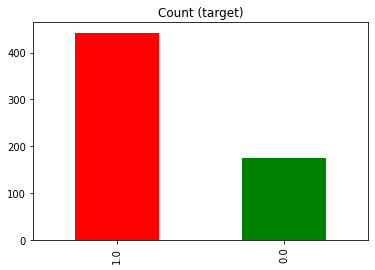

In [8]:
target_count = train_df.im.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

colors = ['red', 'green']

target_count.plot(kind='bar', title='Count (target)', color = colors);

Классы хоть и несбалансированы, но имеют приемлимаю пропорцию.<p>
Рассмотрим распределения признаков.

In [9]:
# функция для вывода графиков распреедления переменной
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

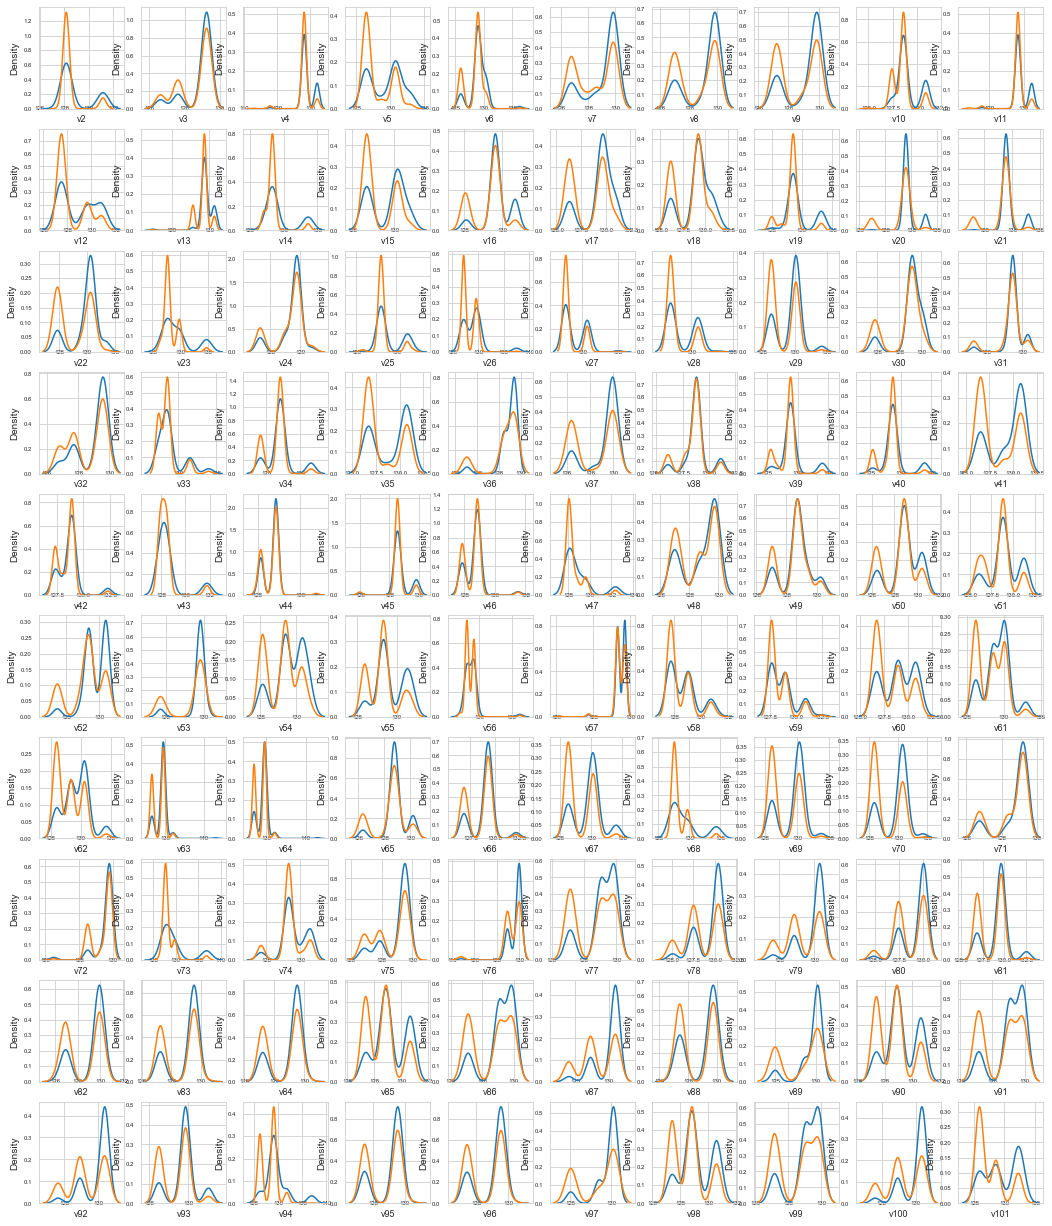

In [10]:
t0 = train_df.loc[train_df['im'] == 0]
t1 = train_df.loc[train_df['im'] == 1]
features = train_df.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)


<Figure size 432x288 with 0 Axes>

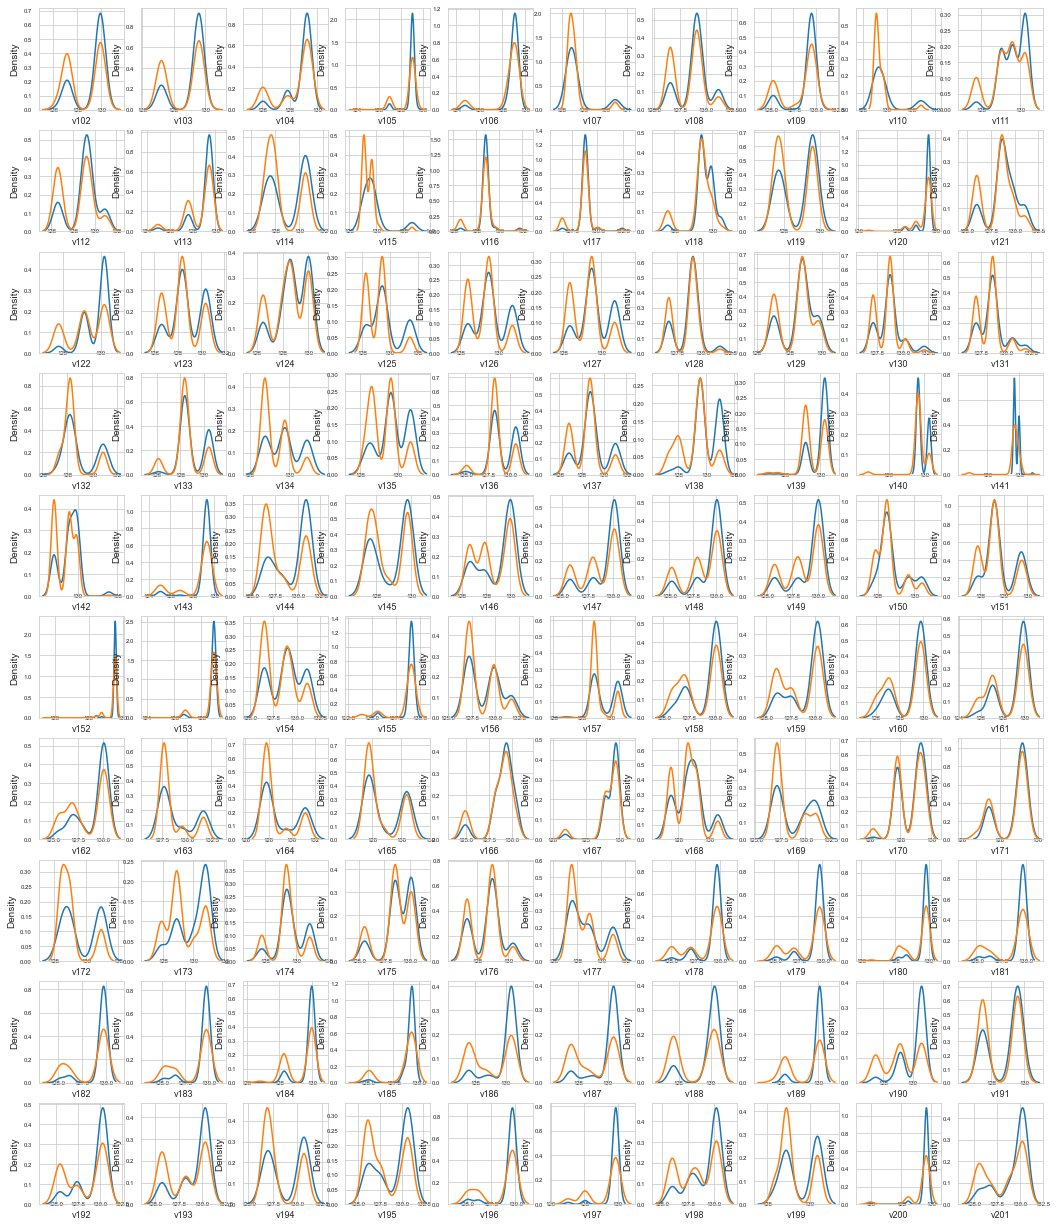

In [11]:
features = train_df.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

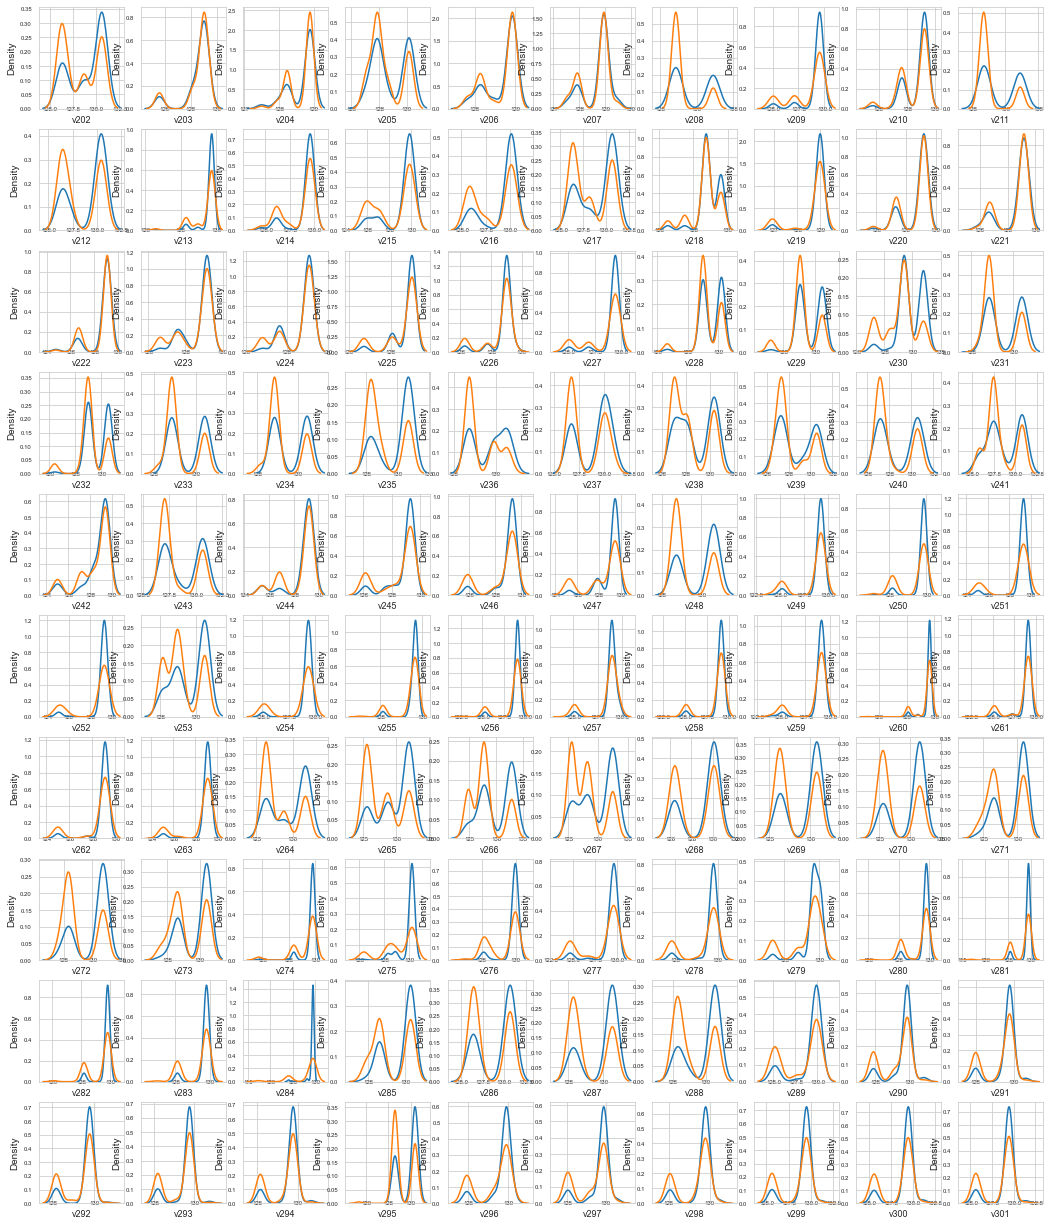

In [12]:
features = train_df.columns.values[202:302]
plot_feature_distribution(t0, t1, '0', '1', features)

Из графиков видно, что зачастую распределения бимодальны, поэтому лог. регрессия не подходит.

<AxesSubplot:>

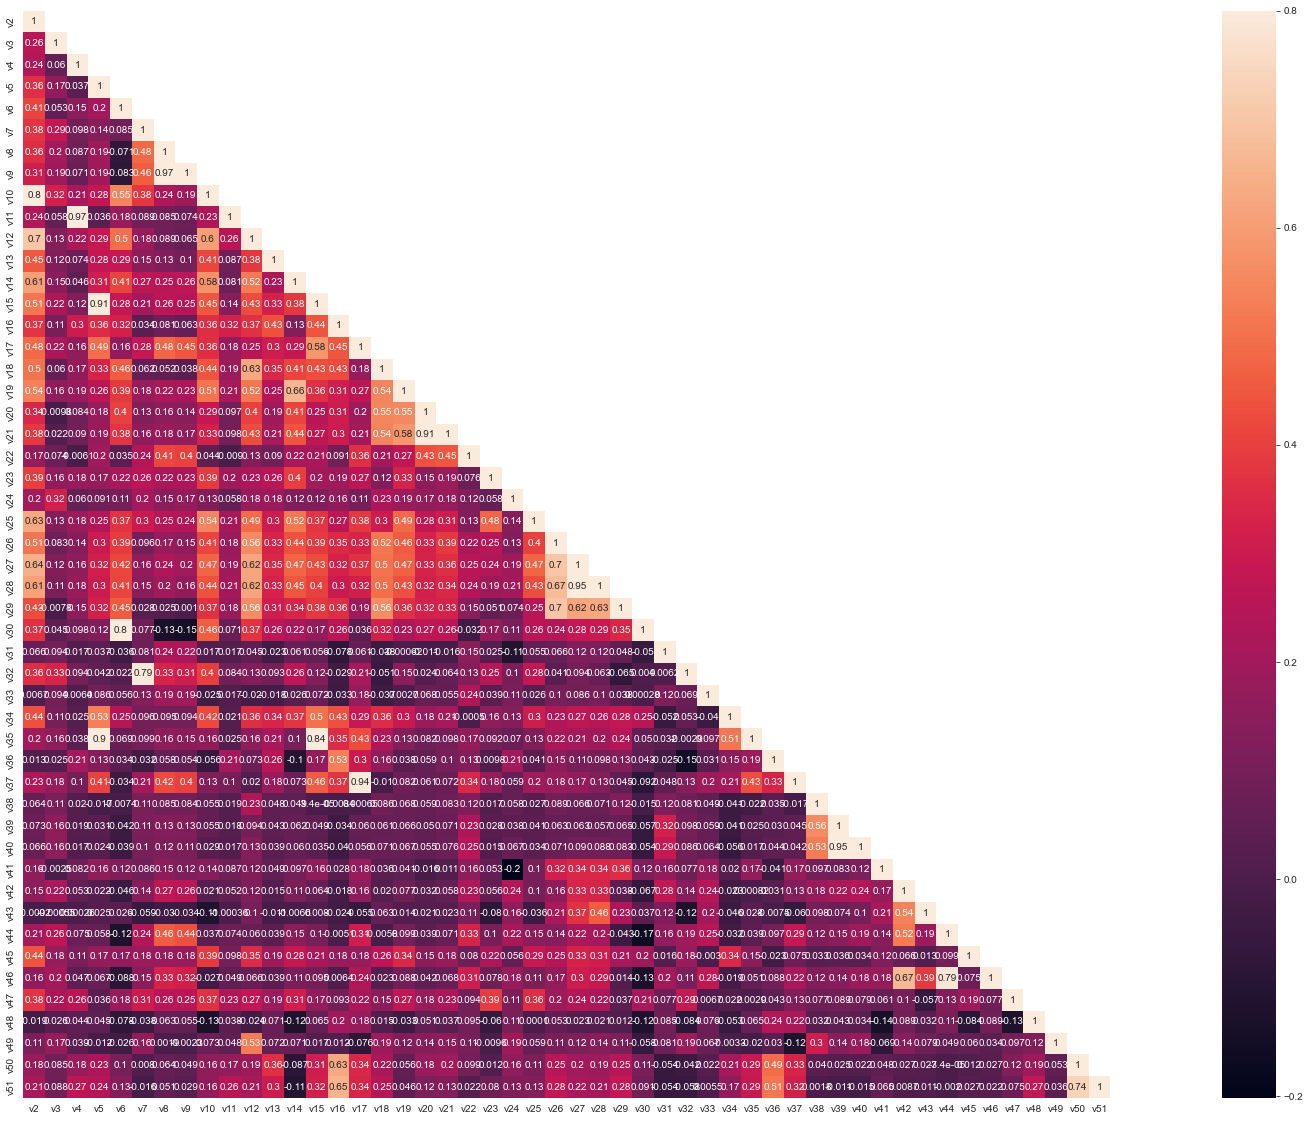

In [13]:
corrMatt = train_df[train_df.columns[2:52]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(40,20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

Уберу коррелирующие столбцы с порогом 0.85 по модулю (на самом деле это дало прирост в 2 процента). 

In [57]:
features = train_df.columns.values
correlations = train_df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.loc[correlations.index % 2 == 0].tail(10)

,level_0,level_1,0
199342,v366,v314,0.992898
199344,v361,v358,0.993624
199346,v89,v97,0.993864
199348,v256,v255,0.994557
199350,v340,v339,0.994651
199352,v92,v87,0.994673
199354,v338,v337,0.995151
199356,v358,v359,0.997737
199358,v77,v91,0.999347
199360,v252,v251,0.999876


In [62]:
corr_cols = correlations.loc[correlations[0] > 0.85]['level_1'].unique()

In [63]:
train_df.drop(columns=corr_cols, axis=1, inplace=True)

In [74]:
train_df.shape

(616, 174)

In [65]:
features = train_df.columns.values
correlations = train_df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.loc[correlations.index % 2 == 0].tail(10)

,level_0,level_1,0
30082,v206,v207,0.807024
30084,v417,v418,0.809099
30086,v73,v110,0.810562
30088,v229,v228,0.811483
30090,v420,v421,0.812517
30092,v132,v133,0.814438
30094,v195,v253,0.829488
30096,v329,v325,0.837783
30098,v115,v110,0.842007
30100,v151,v150,0.843066


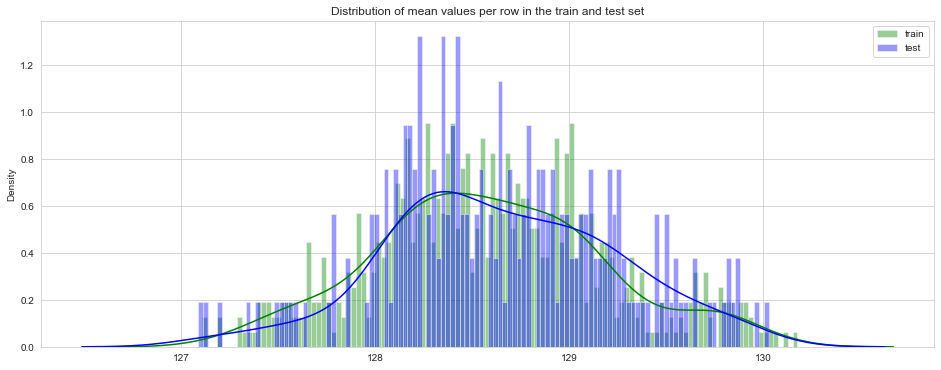

In [66]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train_df[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

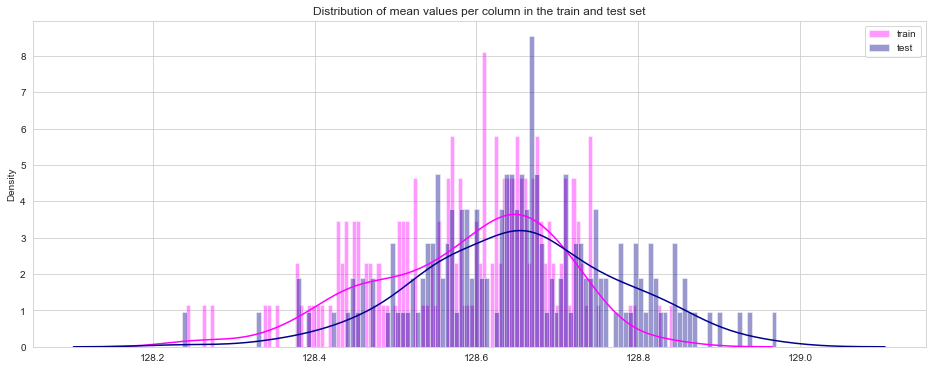

In [67]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train_df[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [68]:
features = [c for c in train_df.columns if c not in ['im']]
target = train_df['im']

In [79]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df[features], target, test_size=0.3, random_state=42, stratify=target)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

Так как данные не структурированные, то можно опробывать нейронку

In [80]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid.values, dtype=torch.float32)

In [86]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(173, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [91]:
model = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [92]:
for epoch in tqdm(range(100)):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.view(-1), y_train)
    loss.backward()
    optimizer.step()

100%|██████████| 100/100 [00:00<00:00, 299.50it/s]


In [93]:
model.eval()
with torch.no_grad():
    outputs = model(X_valid)

In [94]:
roc_auc_nn = roc_auc_score(y_valid, outputs)
roc_auc_nn

0.9331983805668016

In [96]:
test_df.drop(columns=corr_cols, axis=1, inplace=True)

In [97]:
model.eval()
with torch.no_grad():
    sub_3 = model(torch.tensor(scaler.transform(test_df), dtype=torch.float32))

In [98]:
sub_df = pd.DataFrame({"":test_df.index})
sub_df["im"] = [1.0 if prob > 0.5 else 0.0 for prob in sub_3.numpy()]
sub_df.to_csv("submission_4.csv", index=False)